In [1]:
from utils import read_knowledge_graph_from_pickle, find_files_by_timestamp

files = find_files_by_timestamp("20250616_010358", "20250616_073726")
files.sort()

nodes, edges = read_knowledge_graph_from_pickle(files[1])
nodes

defaultdict(list,
            {'Tools': [{'entity_name': 'Tools',
               'entity_type': 'Software or Computational Method',
               'description': 'They are limited in supporting cognitive and affective learning domains and are not effective in handling administrative tasks, making them unsuitable tools in higher education [3].',
               'source_id': 'chunk-6e5671644c3b14cbd6eaa577255c2e8e',
               'file_path': 'example.txt'}],
             'Educational Tools': [{'entity_name': 'Educational Tools',
               'entity_type': 'Educational Tools',
               'description': 'Software or Computational Method',
               'source_id': 'chunk-6e5671644c3b14cbd6eaa577255c2e8e',
               'file_path': 'example.txt'}],
             'Higher Education': [{'entity_name': 'Higher Education',
               'entity_type': 'Higher Education',
               'description': 'Institution or Organization',
               'source_id': 'chunk-6e5671644c3b14cbd6

In [5]:
nodes_reference, edges_reference = read_knowledge_graph_from_pickle(files[0])
nodes_claim, edges_claim = read_knowledge_graph_from_pickle(files[1])

for key in nodes_reference.keys():
    print(key)

Chatbots
Higher Education Users
Investigation
Experts in the Domain of Education Chatbots
Qualitative Inquiry
Semi-Structured Interviews
22
Higher-Education Students and Instructors
Artificial Intelligence
Educational Chatbots
Categorization of Pedagogical Uses
Higher Education
Pedagogical Uses of Chatbots
Semi-structured Interviews
Higher-education Students
Instructors
Experts (AI & Educational Chatbots)
Chatbot Technology
Pedagogies
Categorization of Envisioned Pedagogical Uses
Prospective Integration
On-Going Integration
Retrospective Integration
Chronological Integration
Learning Process
Learning Domains
Cognitive Learning Domain
Affective Learning Domain
Learning Context


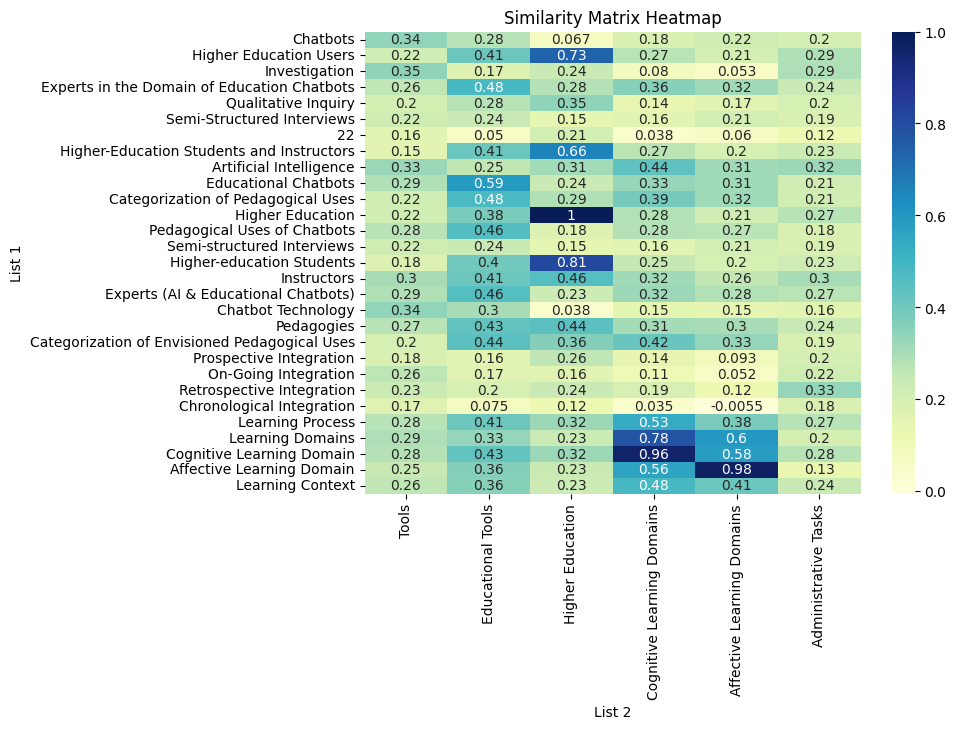

In [7]:
from sentence_transformers import SentenceTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example lists
list1 = list(nodes_reference.keys())
list2 = list(nodes_claim.keys())

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings
embeddings1 = model.encode(list1, convert_to_tensor=True)
embeddings2 = model.encode(list2, convert_to_tensor=True)

# Compute cosine similarity matrix
similarity_matrix = np.inner(embeddings1, embeddings2) / (
    np.linalg.norm(embeddings1, axis=1, keepdims=True) * np.linalg.norm(embeddings2, axis=1)
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=list2, yticklabels=list1, cmap="YlGnBu")
plt.xlabel("List 2")
plt.ylabel("List 1")
plt.title("Similarity Matrix Heatmap")
plt.show()